<a href="https://colab.research.google.com/github/qkezz/imgProcLab3/blob/main/imgLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загружаем изображение
img = cv2.imread('as.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
img_gray.shape
np.min(img_gray) - np.max(img_gray)
'''СТРАТЕГИЯ: делаем серые полосы белыми как фон'''
plt.figure(figsize=(16, 10))


/tmp/ipython-input-115079292.py:2: RuntimeWarning: overflow encountered in scalar subtract
  np.min(img_gray) - np.max(img_gray)


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Исходное изображение

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

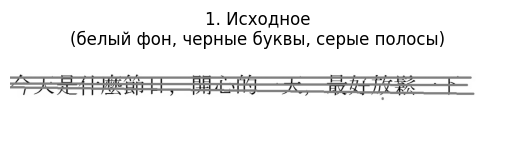

In [ ]:
plt.subplot(1, 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('1. Исходное\n(белый фон, черные буквы, серые полосы)')
plt.axis('off')


Анализируем гистограмму чтобы понять диапазон полос

Text(0, 0.5, 'Количество пикселей')

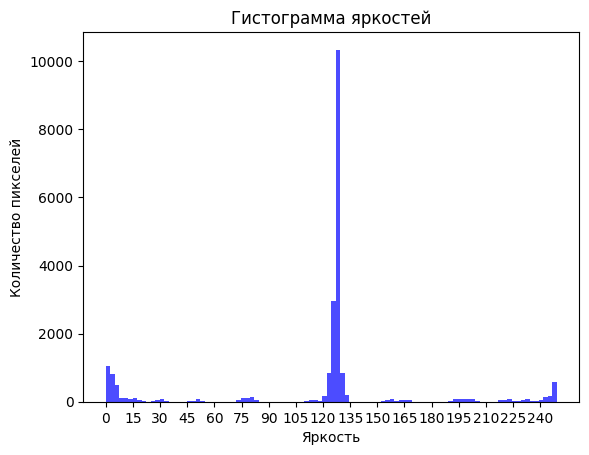

In [ ]:
plt.subplot(1, 1, 1)
img_flatten = img_gray.flatten()
img_gray_not255 = img_flatten[img_flatten < 250]
plt.hist(img_gray_not255, bins=100, color='blue', alpha=0.7)
plt.title('Гистограмма яркостей')
plt.xticks([x for x in range(0,250,15)])
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')

метод: заменяем серые пиксели на белые
Определяем диапазон серых полос (предположительно 100-200)

(np.float64(-0.5), np.float64(1083.5), np.float64(181.5), np.float64(-0.5))

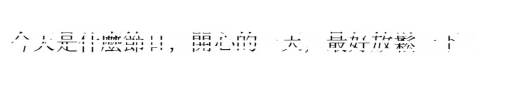

In [ ]:
gray_min, gray_max = 120, 135
img_no_stripes_simple = img_gray.copy()
img_no_stripes_simple[(img_gray >= gray_min) & (img_gray <= gray_max)] = 255

kernel_clean = np.ones((3,3), np.uint8)
kernel_clean[:,0] = 0
kernel_clean[:,2] = 0

img_morph1 = cv2.morphologyEx(img_no_stripes_simple, cv2.MORPH_OPEN, kernel_clean)

plt.subplot(1, 1, 1)
plt.imshow(img_morph1, cmap='gray')
#plt.title('2. Замена серого на белый\n(100-200 → 255)')
plt.axis('off')